# Coalescent Hitting Times
Let $\Omega = \Omega_1\times\Omega_2$ and 

$$
    J(u, \mu, \sigma) = 
    \frac{1}{2}\iint_{\Omega}\!
    (u - u_d)^2\, d\mathbf x 
    + \frac{\alpha_1}{2}\iint_{\Omega}\!
    \nabla\mu \cdot \nabla\mu\, d\mathbf x
    + \frac{\alpha_2}{2}\iint_{\Omega}\!
    \mu \cdot \mu\, d\mathbf x
    + \frac{\beta_1}{2}\iint_{\Omega}\!
    \nabla\sigma \cdot \nabla\sigma\, d\mathbf x
    + \frac{\beta_2}{2}\iint_{\Omega}\!
    \sigma \cdot \sigma\, d\mathbf x
$$

where 

$$
\begin{align*}
    \frac{\sigma^2}{2}\Delta u + \mu\cdot\nabla u &= -1
    \text{ in }\Omega \\
    u &= g
    \text{ on }\partial\Omega
\end{align*}
$$

The goal is to find $(\mu, \sigma)$ that
minimizes $J(u, \mu, \sigma)$ where
$u$ is constrained by the above PDE.

Then the directional derivative of $J$ with respect
to $\mu$ and $\sigma$ in the (arbitrary) directions of $\tilde \mu$ and $\tilde\sigma$, respectively, are

$$
\begin{align*} 
    J_{\mu}(\tilde{\mu}) 
    &= 
    \iint_\Omega\!\mu \cdot\tilde{\mu}\,dxdy
    + 
    \iint_\Omega\!(\tilde{\mu}\cdot\nabla u)p\,dxdy\\
    J_\sigma(\tilde \sigma) 
    &= 
    \beta\sigma\tilde\sigma
    - 
    \tilde\sigma\iint_\Omega\!\nabla u\cdot\nabla p\,dxdy,
\end{align*}
$$

where the adjoint function $p$ solves

$$
\begin{align*}
    \sigma\iint_\Omega\! \nabla\tilde u\cdot\nabla p\, dxdy - \iint_\Omega(\mu \cdot \nabla\tilde u)p\, dxdy
    = \iint_\Omega\!(u - u_d)\tilde u\, dxdy
\end{align*}
$$

for all $\tilde u$.

## Theoretical Calculations

### Lagrangian calculations
Let $F(u, \mu, \sigma) = \frac{\sigma^2}{2}\Delta u + \mu\cdot\nabla u + 1$ 
so that the drift-diffusion PDE is 
$F(u, \mu, \sigma) = 0$. Using directional derivatives of the Lagrangian

$$
\mathcal{L}(u, \mu, \sigma, p) = 
J(u, \mu, \sigma) + 
\langle p, F(u, \mu, \sigma)\rangle
$$

we can write down the analytic weak formulations 
of the state, adjoint, and sensitivity equations:

$$
\begin{align}
    \mathcal{L}_p(u, \mu, \sigma, p)(\tilde p) &= 
    \iint\! \sigma\nabla u\cdot\nabla\tilde p \,dxdy 
    - \iint\! f\tilde p \,dxdy\\
    \mathcal{L}_u(u, \mu, \sigma, p)(\tilde u) &= 
    \iint\! (u-u_d)\tilde u\, dxdy
    + \iint\!  \,dxdy\\
    \mathcal{L}_{\mu}(u, \mu, \sigma, p)(\tilde{\mu}) &= 
    \alpha\iint_\Omega\!\mu \cdot\tilde{\mu}\,dxdy
    + 
    \iint_\Omega\!(\tilde{\mu}\cdot\nabla u)p\,dxdy\\
    \mathcal{L}_\sigma(u, \mu, \sigma, p)(\tilde \sigma) &= 
    \beta\sigma\tilde\sigma
    - 
    \iint_\Omega\!\tilde\sigma\nabla u\cdot\nabla p\,dxdy
\end{align}
$$

The goal of this section is to rewrite these as 
Kronecker products of matrices whose entries are
integrals over $\Omega_1$ and $\Omega_2$. 
Note the arbitrary directions
(denoted with tildes) need only be computed for each
basis element. The big picture flow is:

1. Given $\mu$, $\sigma$, solve the state equation $\mathcal L_p(\tilde p) = 0$ for $u$.
1. Given $\mu$, $\sigma$, and $u$, solve the adjoint equation $\mathcal L_u(\tilde u) = 0$ for $p$.
1. Given $\mu$, $\sigma$, $u$, and $p$, compute the functional sensitivities 
$\mathcal L_\mu(\tilde\mu)$ and 
$\mathcal L_{\sigma}(\tilde{\sigma})$,
which give $\frac{dJ}{d\mu}$ and $\frac{dJ}{d\sigma}$, respectively.
1. Given $\frac{dJ}{d\mu}$ and $\frac{dJ}{d\sigma}$, use a quasi-Newton method (e.g. L-BFGS-B) to minimize $J$ as a function of $\mu$ and $\sigma$.

### State equation discretization
We obtain the state equation by setting (1) equal to zero. In other words, $\mathcal{L}_p(u, \mu, \sigma, p)(\tilde p) =0$ after discretization is the same as $Au - b = 0$. 
Now, the stiffness matrix $A$ is 

\begin{align*}
A_{ij,k\ell} = 
&\sigma\int\! \phi'_k\hat\phi'_i \,dx 
\int\! \phi_\ell\hat\phi_j \,dy
+ \sigma\int\! \phi_k\hat\phi_i \,dx 
\int\! \phi'_\ell\hat\phi'_j \,dy\\
&\quad+ \int\! b_1\phi'_k\hat\phi_i \,dx
\int\! \phi_\ell\hat\phi_j \,dy
+ \int\! \phi_k\hat\phi_i \,dx
\int\! b_2 \phi'_\ell\hat\phi_j \,dy
\end{align*}

Further assuming $f$ is separable such that 
$f(x,y) = f_1(x)f_2(y)$, the right hand side 
of the linearized state equation is

$$
b_{ij} = \int\! f_1 \hat\phi_i\, dx
\int\! f_2\hat\phi_j\, dy
$$

### Adjoint equation discretization
We obtain the adjoint equation by setting (2) equal to zero.
In other words, $\mathcal{L}_u(u, \mu, \sigma, p)(\tilde u) = 0$
after discretization is the same as $A^T p - c = 0$
To solve the adjoint equation $A^T p = c$ we need only
compute the right hand side $c$ and apply vanishing boundary conditions on $p$. 
Let $r(x,y) = u_d(x,y) - u(x,y)$ so that 
$r(x,y) = \sum_{ij}r_{ij}\phi_i(x)\phi_j(y)$.
It follows that the adjoint right hand side is

$$
c_{ij} = \int_\Omega\! r(x,y)\phi_i\phi_j \,dxdy 
= \sum_{k\ell}r_{k\ell}
\int\! \phi_k\phi_i\, dx
\int\! \phi_\ell\phi_j\, dy
$$

or in vector notation $c = r^T M\otimes M$
where $M_{ij} = \int_\Omega\! \phi_i\phi_j \, dx$
and $r$ is the vector of nodal values of $u_d - u$.

### Sensitivity equation discretization
We obtain the sensitivity equation by setting (3) equal to zero, since we will have a local optimum when the gradient vanishes. In practice, we are only interested
in computing 
$\mathcal{L}_{\mu}(\tilde{\mu})$
and
$\mathcal{L}_\sigma(\tilde \sigma)$
to inform how we can update $\mu$ and $\sigma$, respectively.
This way we hope to converge to optimal parameters
$\mu^*$ and $\sigma^*$ so that 
$\mathcal{L}_{\mu}(\tilde{\mu}) = 0$
and
$\mathcal{L}_\sigma(\tilde \sigma) = 0$
for all $\tilde{\mu}$ and $\tilde\sigma$, respectively.
After solving the state and adjoint equations we have
$u$ and $p$, so we need only compute

$$\begin{align*}
    \frac{dJ}{d{\mu}} &= p \left(\frac{\partial b}{\partial {\mu}} 
    - \frac{\partial A}{\partial{\mu}}u\right)
    + \frac{\partial J}{\partial{\mu}}\\
    \frac{dJ}{d\sigma} &= p \left(\frac{\partial b}{\partial \sigma} 
    - \frac{\partial A}{\partial \sigma}u\right)
    + \frac{\partial J}{\partial \sigma}
\end{align*}$$

### Partial derivatives for $A$, $b$, $J$
First we want to compute 
$\frac{\partial A}{\partial\sigma}$ and
$\frac{\partial A}{\partial\mu}$.
Recall

$$
A_{ij,k\ell} = 
\sigma\int\! \phi'_k\hat\phi'_i \,dx 
\int\! \phi_\ell\hat\phi_j \,dy
+ \sigma\int\! \phi_k\hat\phi_i \,dx 
\int\! \phi'_\ell\hat\phi'_j \,dy
+ \int\! b_1\phi'_k\hat\phi_i \,dx
\int\! \phi_\ell\hat\phi_j \,dy
+ \int\! \phi_k\hat\phi_i \,dx
\int\! b_2 \phi'_\ell\hat\phi_j \,dy
$$

The $\sigma$ derivative is straightforward
since $\sigma$ is a constant. Indeed, we have

$$
\frac{\partial A_{ij,k\ell}}{\partial\sigma} = 
\int\! \phi'_k\hat\phi'_i \,dx 
\int\! \phi_\ell\hat\phi_j \,dy
+ \int\! \phi_k\hat\phi_i \,dx 
\int\! \phi'_\ell\hat\phi'_j \,dy
$$

We are assuming $\mu = (\mu(x), \mu(y))^T$ 
with finite element basis 

$$
\left\{
\begin{pmatrix}\phi_1(x)\\ \phi_1(y)\end{pmatrix}, 
\ldots, 
\begin{pmatrix}\phi_n(x)\\ \phi_n(y)\end{pmatrix}
\right\}
$$

Thus $\frac{dA}{d\mu}$ will be a tensor
with shape $(n^2, n^2, n)$ where we use the
directions of
$\tilde{\mu}(x,y) = (\phi_r(x), \phi_r(y))^T$ 
for $1\leq r \leq n$ when computing
$\frac{dA}{d\mu_r}$.
Therefore,

$$
\begin{align*}
\frac{\partial A_{ij,k\ell}}{\partial\mu_{r}} &= 
\int\! \phi_r\phi'_k\hat\phi_i \,dx
\int\! \phi_\ell\hat\phi_j \,dy
+
\int\! \phi_k\hat\phi_i \,dx
\int \phi_{r} \phi'_\ell\hat\phi_j \,dy
\end{align*}
$$

Since the right hand side of $Au=b$ is independent of both $\sigma$ and $\mu$, it follows that $\frac{\partial b}{\partial\sigma} = 0$
and $\frac{\partial b}{\partial\mu} = 0$.

Notice when we sum over $k\ell$ with $u$ and sum over $ij$ with $p$
we obtain the $\iint_\Omega\!(\tilde{\mu}\cdot\nabla u)p\,dxdy$ 
term in the above sensitivity equation 
$\mathcal{L}_{\mu}(\tilde{\mu})$,
which happens to also be 
$p \left(\frac{\partial b}{\partial {\mu}} 
    - \frac{\partial A}{\partial{\mu}}u\right)$
from the above expression for $\frac{dJ}{d{\mu}}$

Similarly, 
$\frac{\partial J}{\partial\sigma} = \beta\sigma$ 
so now we need to compute the discretized
$\frac{\partial J}{\partial {\mu}}(\tilde{\mu}) = \alpha\iint\! \mu \cdot \tilde{\mu} \,dxdy$,

$$
\begin{align*}
\frac{\partial J}{\partial \mu_{r}} &= 
\alpha\int\! \mu\phi_r \,dx
\int\! \,dy 
+
\int\!\,dx
\int\! \mu\phi_r\,dy
\end{align*}
$$

## Numerical Calculations

### Imports and helpful functions

In [1]:
import sys
sys.path.append(sys.path[0] + '/..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.optimize as opt
from fenics import *
from product_fem import product_fem as pf
from product_fem.equations import HittingTimes

In [2]:
# notebook parameters
n = 28 # mesh resolution
sig = 2.5e-1 # diffusion coefficient
f = (['-1.0'], ['1.0']) # forcing function
alpha, beta = (1.0e-06, 1e-8), 0. # regularization parameters

In [3]:
# helpful notebook functions
def generate_interval_mesh(vertices):
    n_cells = len(vertices) - 1
    
    mesh = Mesh()
    editor = MeshEditor()
    editor.open(mesh, 'interval', 1, 1)
    editor.init_vertices(len(vertices))
    editor.init_cells(len(vertices)-1)
    
    for i, x in enumerate(vertices):
        editor.add_vertex(i, Point(x))
    for i in range(n_cells):
        editor.add_cell(i, [i, i+1])
        
    editor.close()
    return mesh
   
def plot_u(u, W, title=None):
    n = W.V.dim()
    V_coords = W.dofmap.marginal_dof_coords
    X, Y = np.meshgrid(V_coords, V_coords, indexing='ij')
    Z = u.reshape(n, n) if u.ndim==1 else u

    fig, ax = plt.subplots(figsize=(6,6))
    a = ax.contourf(X, Y, Z, levels=8)
    ax.set_aspect('equal')
    if title: ax.set_title(title, fontsize=15)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(a, cax=cax, orientation='vertical')
    plt.show()
    
def plot_us(us, W, titles=None, cbar_scale=None, **kwargs):
    n = W.V.dim()
    V_coords = W.dofmap.marginal_dof_coords
    X, Y = np.meshgrid(V_coords, V_coords, indexing='ij')
    Zs = [u.reshape(n, n) if u.ndim==1 else u for u in us]
    
    if cbar_scale=='same':
        levels = np.linspace(np.min(Zs), np.max(Zs), 8)
    else:
        levels = 8
    fig, ax = plt.subplots(1, len(us), figsize=(10, 5), sharey=True, **kwargs)
    for i in range(len(us)):
        a = ax[i].contourf(X, Y, Zs[i], levels=levels)
        ax[i].set_title(titles[i], fontsize=15)
        ax[i].set_aspect('equal')
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(a, cax=cax, orientation='vertical')
    plt.show()
    
def plot_mu(mu, W, labels=None):
    n = W.V.dim()
    V_coords = W.dofmap.marginal_dof_coords
    fig, ax = plt.subplots()
    if isinstance(mu, tuple):
        for i, mi in enumerate(mu):
            if labels: ax.plot(V_coords, mi, label=labels[i])
            else: ax.plot(V_coords, mi)
        if labels: plt.legend()
    else:
        ax.plot(V_coords, mu)
    ax.set_xlabel(r'x')
    ax.set_ylabel(r'$\mu(x)$', rotation=0)
    plt.show()
    
def plot_results(results, mu0, mu_true):
    mu_hat = results['x']
    plot_mu((mu_true, mu_hat), W, labels=(r'$\mu$', r'$\hat\mu$'))
    
    u0 = eqn.solve(sig, mu0)
    u_hat = eqn.solve(sig, mu_hat)
    
    plot_us((u_d, u_hat), W, titles=(r'$u$', r'$\hat u$'), cbar_scale='same')
    plot_u(np.abs(u_d - u_hat), W, title=r'$|u - \hat u|$')

### Forward pass inspection

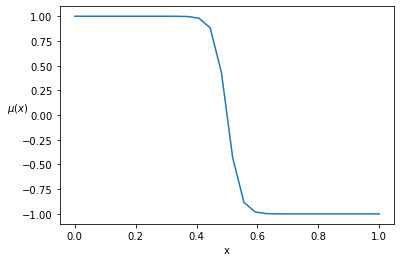

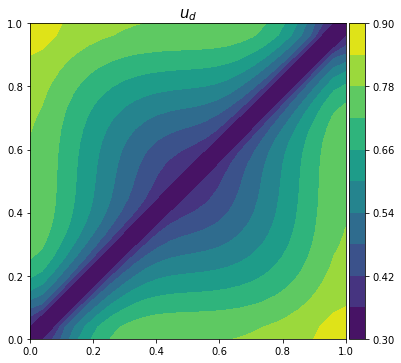

In [4]:
# mesh and function spaces
mesh = UnitIntervalMesh(n-1)
V = FunctionSpace(mesh, 'CG', 1)
v2d = vertex_to_dof_map(V)
W = pf.ProductFunctionSpace(V)

# boundary conditions
def on_product_boundary(x, y):
    eps = 0.05
    return np.abs(x - y) <= eps
bc = pf.ProductDirichletBC(W, 0.35, on_product_boundary)

# generate ground truth data u_d
eqn = HittingTimes(W, f, bc)
mu_true = eqn.mu_str_to_array('-2 / (1 + exp(-50 * (x[0] - 0.5))) + 1')
u_d = eqn.solve(sig, mu_true)

plot_mu(mu_true, W)
plot_u(u_d, W, title=r'$u_d$')

In [5]:
# compare Au to f to verify solution
np.allclose(eqn.stiffness.dot(u_d), eqn.rhs)

True

### Gradient inspection

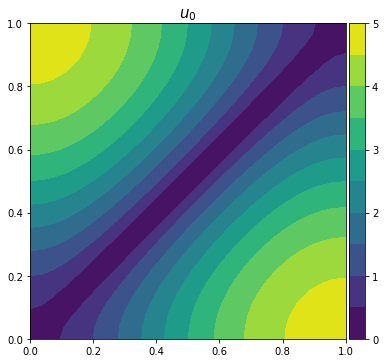

In [6]:
# restart with data u_d and new choice of mu
del eqn
eqn = HittingTimes(W, f, bc, u_d)
mu0 = np.zeros_like(mu_true) 
u0 = eqn.solve(sig, mu0)
plot_u(u0, W, title=r'$u_0$')

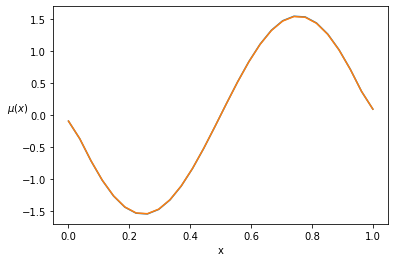

In [7]:
# compare adjoint grads to perturbation grads
h = 0.001
eye = np.eye(len(mu0))
diff_quots = np.zeros_like(mu0)
for i in range(len(eye)):
    mupert = mu0 + h * eye[i]
    J = eqn.loss_functional(sig, mu0, alpha, beta)
    Jpert = eqn.loss_functional(sig, mupert, alpha, beta)
    diff_quots[i] = Jpert / h - J / h
    
J_grads = eqn.compute_gradient(sig, mu0, alpha, beta)[0]
rel_percent_err = 100 * np.abs((diff_quots - J_grads) / diff_quots)

# these should align
# note the loss surface is flatter the closer the grads are to zero
# suggesting we have higher uncertainty for smaller magnitude grads
plot_mu((diff_quots, J_grads), W)

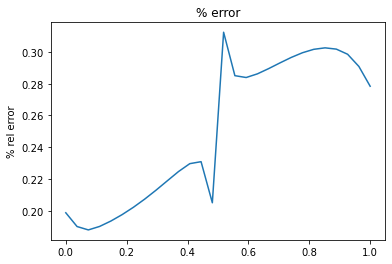

In [8]:
# this table can highlight any discrepencies between the empirical
# difference quotients and the adjoint gradients
mu_emp = diff_quots
mu_adj = J_grads
mu_err = rel_percent_err
V_coords = V.tabulate_dof_coordinates().flatten()
err_df = pd.DataFrame({'x': V_coords, 
                       'mu empirical': mu_emp, 
                       'mu adjoint': mu_adj, 
                       'mu %error': mu_err})

def plot_err(err):
    # plots percent relative error |(empirical_dJdb - adjoint_dJdb) / empirical_dJdb|
    fig, ax = plt.subplots(1, 1, sharex=True)
    
    x = err['x']
    e = err['mu %error']
    ax.set_title('% error')
    ax.plot(x, e)
    ax.set_ylabel('% rel error')
    plt.show()
    
plot_err(err_df)

## Optimization

In [9]:
def loss_and_grad(mu, *args):
    sig, alpha, beta = args
    return eqn.loss_and_grad(sig, mu, alpha, beta)

fun = loss_and_grad
args = (sig, alpha, beta)
method = 'L-BFGS-B'
jac = True
options = {'ftol': 1e-09, # objective func tolerance, default 2.220446049250313e-09
           'gtol': 1e-05} # projected grad tolerance, default 1e-05

def optimize_mu(mu0, alpha):
    args = (sig, alpha, beta)
    return opt.minimize(fun, mu0, args, method, jac, options=options)

In [10]:
results = optimize_mu(mu0, alpha)

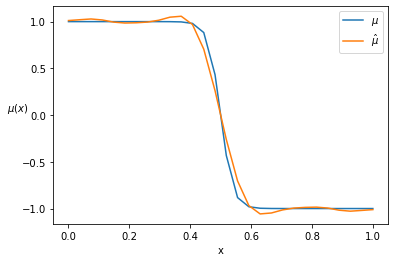

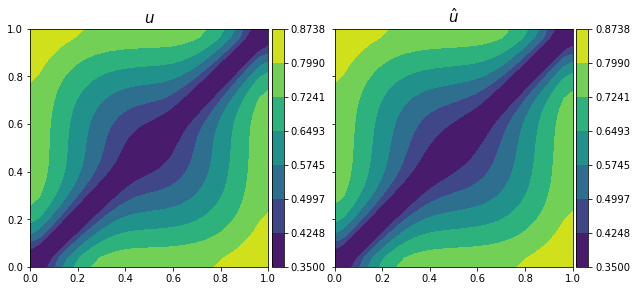

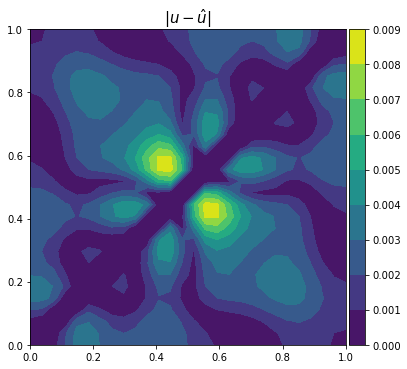

In [11]:
plot_results(results, mu0, mu_true)

## Fit to Pop Gen Sim

In [12]:
import os
import tskit, pyslim, msprime
import PIL.Image as Image
sys.path.append(sys.path[0] + '/../../landscape-inference')
import maps
rng = np.random.default_rng(2357)
rel_path = '../../landscape-inference/'

### simulating

In [13]:
valley_params = {
    'width' : 500,
    'height' : 2,
    'resolution' : 20,
    'sigma' : 0.1,
    'K' : 20,
    'bias' : 0.02,
    'mu' : 1e-8,
}
channel_shape = (valley_params['height'], valley_params['width'], 1)
valley = np.concatenate([
            maps.floats_to_rgb(np.full(channel_shape, 0.0), min=-1, max=1),  # R
            maps.floats_to_rgb(np.full(channel_shape, 0.0), min=-1, max=1),  # G
            maps.floats_to_rgb(np.full(channel_shape, 1.0), min=0, max=1),   # B
            np.full(channel_shape, 255, dtype='uint8'), # alpha
        ], axis=-1)
for j in range(valley_params['height']):
    valley[j,:int(valley_params['width'] / 2),0] = 0
    valley[j,int(valley_params['width'] / 2):,0] = 255

im = Image.fromarray(valley)
im.save(rel_path + "valley.png")

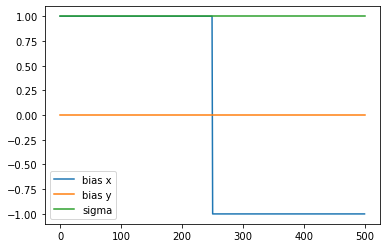

In [14]:
x = np.asarray(Image.open(rel_path + "valley.png"))
x[0,:,0] = np.flip(x[0,:,0])
assert x.shape[:-1] == channel_shape[:-1]
assert np.all(x[:, :, 1] == 127)
assert np.all(x[:, :, 2] == 255)
assert np.all(x[:, :, 3] == 255)

fig, ax = plt.subplots()
ax.plot(maps.rgb_to_floats(x[0,:,0]), label='bias x')
ax.plot(maps.rgb_to_floats(x[0,:,1]), label='bias y')
ax.plot(maps.rgb_to_floats(x[0,:,2]), label='sigma')
ax.legend();

In [15]:
treefile = rel_path + "problem_statement_1d/valley.trees"
if not os.path.isfile(treefile):
    !slim -d f"DISPERSAL_MAP_FILE='{rel_path + 'valley.png'}'" \
         -d MAP_RESOLUTION={valley_params['resolution']} \
         -d K={valley_params['K']} \
         -d "OUTPATH='{treefile}'" \
         -d NUMGENS=600000 \
         -d SIGMA={valley_params['sigma']} \
         -d BIAS={valley_params['bias']} \
         sim_with_dispersal_map.slim &> problem_statement_1d/valley.run.log

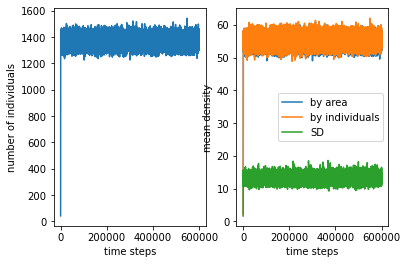

In [16]:
simlog = pd.read_csv(rel_path + "problem_statement_1d/valley.trees.log")
da = valley_params['height'] / valley_params['resolution']

# empirical neighborhood size
valley_params['Nloc'] = np.mean(simlog['neighbor_density_mean']) * da * 2 * valley_params['sigma']
params = valley_params

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.plot(simlog['generation'], simlog['num_individuals'])
ax1.set_xlabel('time steps')
ax1.set_ylabel('number of individuals')
ax2.plot(simlog['generation'], simlog['total_density'] * da, label='by area')
ax2.plot(simlog['generation'], simlog['neighbor_density_mean'] * da, label='by individuals')
ax2.plot(simlog['generation'], simlog['neighbor_density_sd'] * da, label='SD')
ax2.set_xlabel("time steps")
ax2.set_ylabel("mean density")
ax2.legend();

In [17]:
ts = pyslim.load(rel_path + "problem_statement_1d/valley.trees")
ts

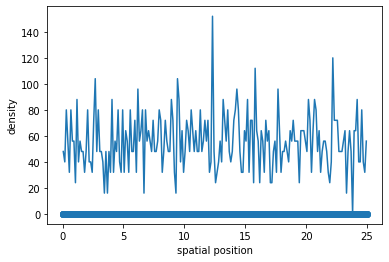

In [18]:
bins = np.linspace(-0.001, params['width']/params['resolution'] + 0.001, 201)
counts = np.bincount(
    np.searchsorted(bins, ts.individual_locations[:,0], side='right') - 1,
    minlength=len(bins) - 1)
fig, ax = plt.subplots()
ax.plot(bins[1:] - np.diff(bins)/2, counts / np.diff(bins))
ax.scatter(ts.individual_locations[:,0], np.zeros((ts.num_individuals,)))
ax.set_xlabel('spatial position')
ax.set_ylabel('density');

In [19]:
inds = np.where(np.abs(ts.individual_locations[:,0]*params['resolution'] - params['width']/2) < params['width']/4)[0]
N = min(100, len(inds))
inds = rng.choice(inds, size=N, replace=False)
L = ts.individual_locations[inds,:2]
X = np.matmul(L, L.T)
d = np.diag(X)
geog_dist = np.sqrt(d[:,np.newaxis] + d - 2 * X)
assert np.allclose(np.diag(geog_dist), 0.0)
assert np.allclose(geog_dist, geog_dist.T)

dists = pd.DataFrame(
    {'i': [inds[i] for i in range(N) for j in range(N) if i <= j],
     'j': [inds[j] for i in range(N) for j in range(N) if i <= j],
     'geog': [geog_dist[i,j]  for i in range(N) for j in range(N) if i <= j]}
)

mts = msprime.sim_mutations(ts, rate=params['mu'])

for mode in ('branch', 'site'):
    dists[mode] = mts.divergence(
        sample_sets=[i.nodes for i in mts.individuals()],
        indexes=[(i, j) for i, j in zip(dists['i'], dists['j'])],
        mode=mode,
    )

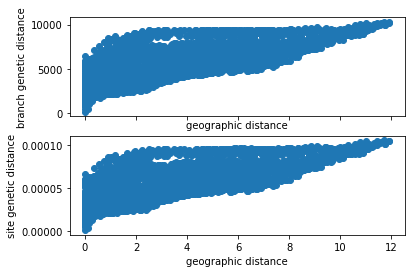

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
for (ax, mode) in zip(axes, ('branch', 'site')):
    ax.scatter(dists['geog'], dists[mode])
    ax.set_xlabel("geographic distance")
    ax.set_ylabel(f"{mode} genetic distance");

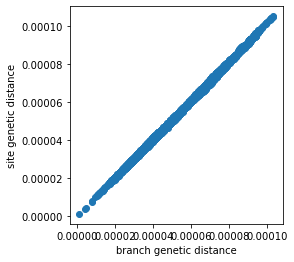

In [21]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(dists['branch']*valley_params['mu'], dists['site'])
ax.set_xlabel("branch genetic distance")
ax.set_ylabel("site genetic distance")
plt.show()

In [22]:
pos_i = np.zeros_like(dists['geog']) # spatial position of individuals at dists['i']
pos_j = np.zeros_like(dists['geog']) # spatial position of individuals at dists['j']

for ij in range(len(dists)):
    pos_i[ij] = L[np.where(inds==dists['i'][ij])[0].item(),0]
    pos_j[ij] = L[np.where(inds==dists['j'][ij])[0].item(),0]
dists['pos_i'] = pos_i
dists['pos_j'] = pos_j

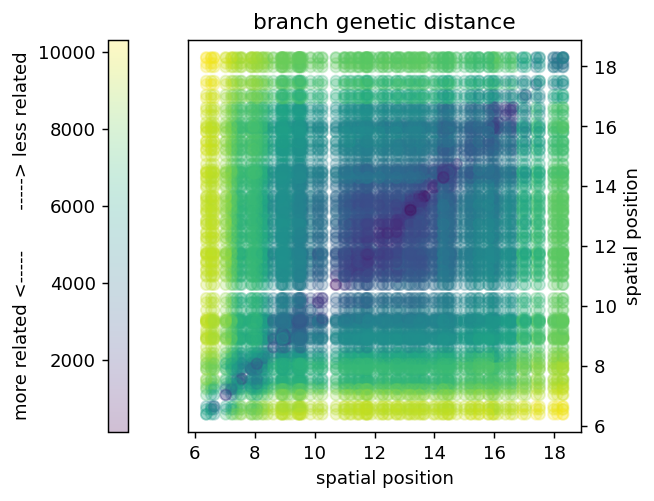

In [23]:
# make heatmap with pairwise geo dist and color is branch genetic dists
fig, ax = plt.subplots(dpi=130)
ax.set_aspect('equal')
ax.set_title('branch genetic distance')
ax.set_xlabel('spatial position')
ax.set_ylabel('spatial position')
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.scatter(x=dists['pos_i'], y=dists['pos_j'], c=dists['branch'], alpha=0.25)
a = ax.scatter(x=dists['pos_j'], y=dists['pos_i'], c=dists['branch'], alpha=0.25)
cbar = plt.colorbar(a, location='left')
cbar.set_label('more related <-----       -----> less related')
plt.show()

In [24]:
dists

,i,j,geog,branch,site,pos_i,pos_j
0,379,379,0.000000,2515.206233,0.000025,14.160834,14.160834
1,379,989,4.299420,4599.320115,0.000046,14.160834,9.861417
2,379,220,0.582047,3147.097266,0.000032,14.160834,14.739038
3,379,1161,1.880762,3437.111360,0.000035,14.160834,12.281212
4,379,1273,2.378425,4481.533972,0.000046,14.160834,16.538219
...,...,...,...,...,...,...,...
5045,104,528,2.260549,4654.508139,0.000047,9.525231,11.784792
5046,104,485,3.675315,4599.728409,0.000046,9.525231,13.200533
5047,528,528,0.000000,2047.611954,0.000021,11.784792,11.784792
5048,528,485,1.416891,2632.534288,0.000026,11.784792,13.200533


TODO: rethink exactly how to project u_N to u_n when N<n

In [25]:
# map dists['i'] to ordered vertices to use for mesh
# then use vertex to dof map to assign rows to u_N
locs_inds = sorted(list(zip(L[:,0], inds)))
mesh_vertices, mesh_inds = zip(*locs_inds)
mesh_vertices, mesh_inds = np.array(mesh_vertices), np.array(mesh_inds)

# rescale landscape to [0,1]
mesh_vertices -= np.min(mesh_vertices)
mesh_vertices /= np.max(mesh_vertices)

# mesh and function space
mesh_N = generate_interval_mesh(mesh_vertices)
V_N = FunctionSpace(mesh_N, 'CG', 1)
v2d_N = vertex_to_dof_map(V_N)
V_N_inds = mesh_inds[v2d_N]

u_N = np.zeros((N,N))
X_inds, Y_inds = np.meshgrid(V_N_inds, V_N_inds, indexing='ij')
for i in range(N):
    for j in range(N):
        xij = X_inds[i,j]
        yij = Y_inds[i,j]
        dists_ij = (dists['i']==xij) * (dists['j']==yij)
        if sum(dists_ij)==0:
            dists_ij = (dists['i']==yij) * (dists['j']==xij)
        u_N[i,j] = dists['branch'][dists_ij]

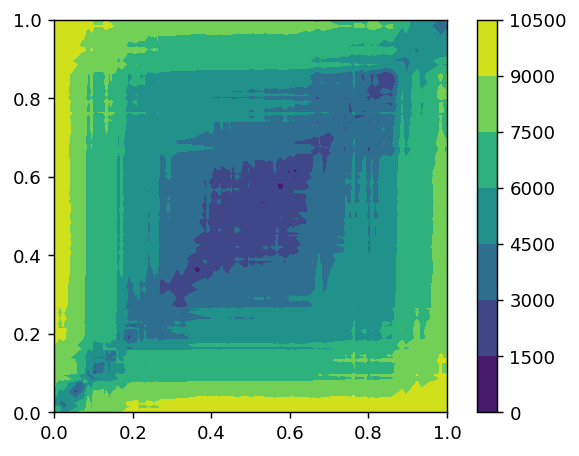

In [26]:
V_N_coords = V_N.tabulate_dof_coordinates()
X, Y = np.meshgrid(V_N_coords, V_N_coords, indexing='ij')
Z = u_N

fig, ax = plt.subplots(dpi=130)
a = ax.contourf(X, Y, Z)
ax.set_aspect('equal')
plt.colorbar(a)
plt.show()

### project simulated data

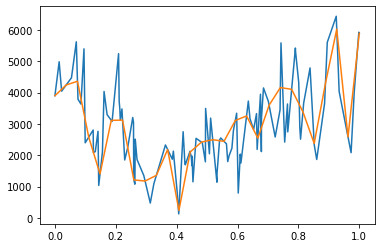

In [27]:
u_N_diag = Function(V_N)
u_N_diag.vector()[:] = np.diag(u_N)[v2d_N].copy()
u_n_diag = project(u_N_diag, V)
plot(u_N_diag)
plot(u_n_diag)
plt.show()

In [28]:
# to project the product function and not just a single slice,
# first identify which rows of u_N are closest to the dofs in V
u_n = np.zeros((V.dim(), V.dim()))
for i in range(V.dim()):
    ii = np.argmin(np.abs(V_coords[i] - V_N_coords))
    u_N_slice = Function(V_N)
    u_N_slice.vector()[:] = u_N[ii].copy()
    u_n[i] = project(u_N_slice, V).vector()[:]
u_n_sym = 1/2 * (u_n + u_n.T) # symmetric matrix projection

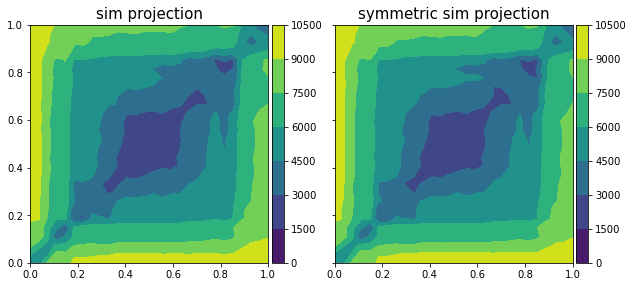

In [29]:
plot_us((u_n, u_n_sym), W, titles=('sim projection', 'symmetric sim projection'))

### fit model

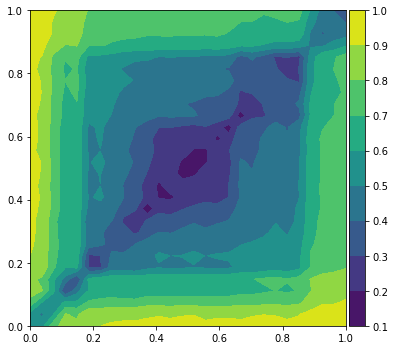

In [30]:
u_data = u_n_sym.flatten() / np.max(u_n_sym)
plot_u(u_data, W)

In [31]:
W_coords = W.tabulate_dof_coordinates()
bdy_xy = [xy for xy in bc.get_product_boundary_coords()]
bdy_x, bdy_y = zip(*bdy_xy)
bdy_dofs = [dof for dof in bc.get_product_boundary_dofs()]
del bdy_dofs
def u_bdy(x,y):
    eps = 0.001
    xy = (x + y) / 2
    xy_dists = np.array([(xi-yi)**2 + (xy-xi)**2 + (xy-yi)**2 for xi, yi in W_coords])
    xy_var = 2 * eps ** 2
    ker = np.exp(-(xy_dists) / xy_var)
    ker = np.array(ker)
    assert np.sum(ker) > 0.
    return np.sum(u_data * ker) / np.sum(ker)

bc = pf.ProductDirichletBC(W, u_bdy, on_product_boundary)
del eqn
eqn = HittingTimes(W, f, bc, u_data)

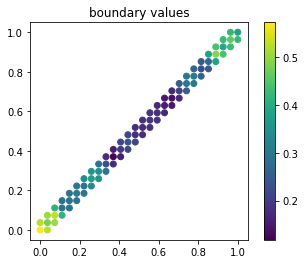

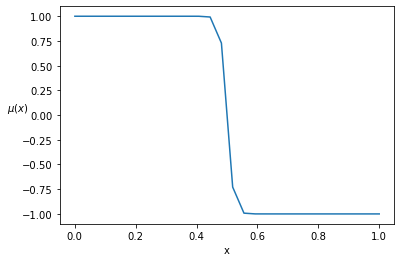

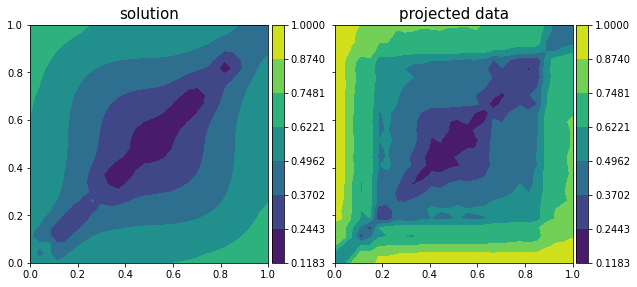

In [32]:
# examine boundary conditions
# plot mesh vertices colored by on_boundary
bdy_data = np.array([u_bdy(*xy) for xy in bdy_xy])
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_title('boundary values')
a = ax.scatter(x=bdy_x, y=bdy_y, c=bdy_data)
plt.colorbar(a)
plt.show()

mu_true = eqn.mu_str_to_array('-2 / (1 + exp(-100 * (x[0] - 0.5))) + 1')
u_true = eqn.solve(sig, mu_true)
plot_mu(mu_true, W)
plot_us((u_true, u_data), W, ('solution', 'projected data'), cbar_scale='same')

In [40]:
def show_results(results):
    mu_hat = results['x']
    u_hat = eqn.solve(sig, mu_hat)

    mus = (mu_true, mu_hat, mu0)
    labels = (r'$\mu$', r'$\hat\mu$', r'$\mu_0$')
    plot_mu(mus, W, labels)

    us = (u_hat, u_data)
    titles = (r'$\hat \pi(x,y)$', r'simulated $\pi(x,y)$')
    plot_us(us, W, titles, dpi=130, cbar_scale='same')
    plot_u(np.abs(u_hat - u_data), W, title=r'$|\hat\pi - \pi|$')

In [34]:
results = optimize_mu(mu0, alpha=(1e-4, 0.))

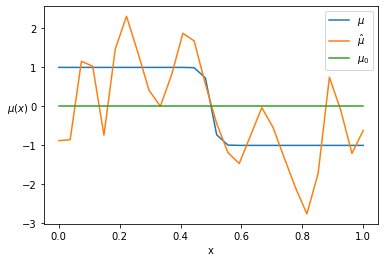

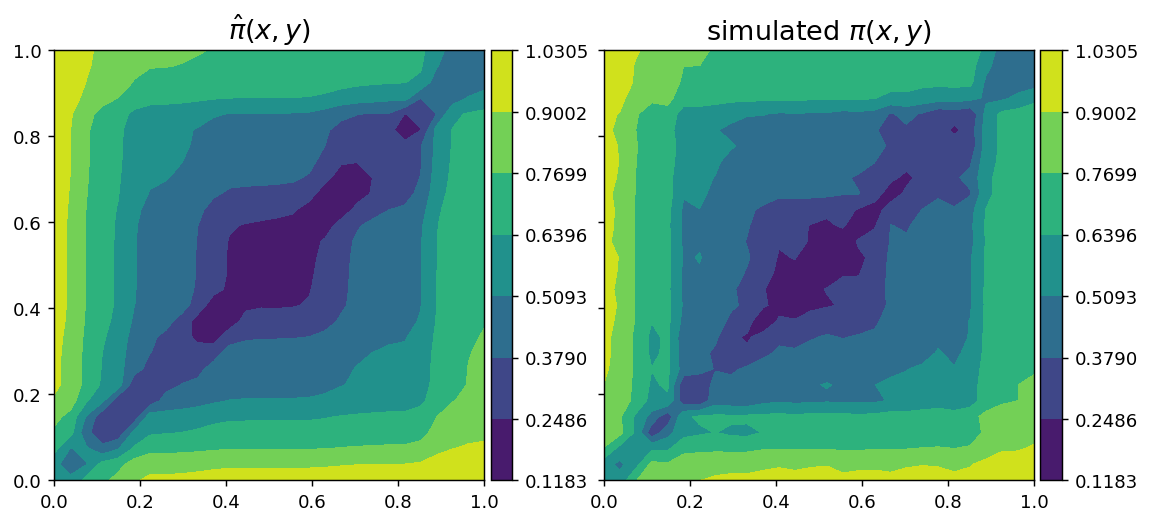

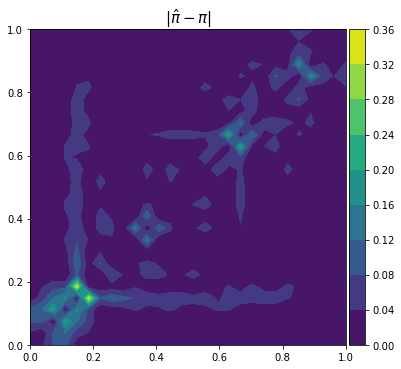

In [41]:
show_results(results)

In [36]:
results = optimize_mu(mu0, alpha=(1e-7, 1e-7))

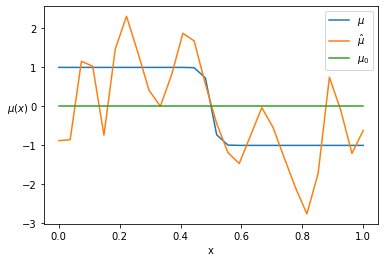

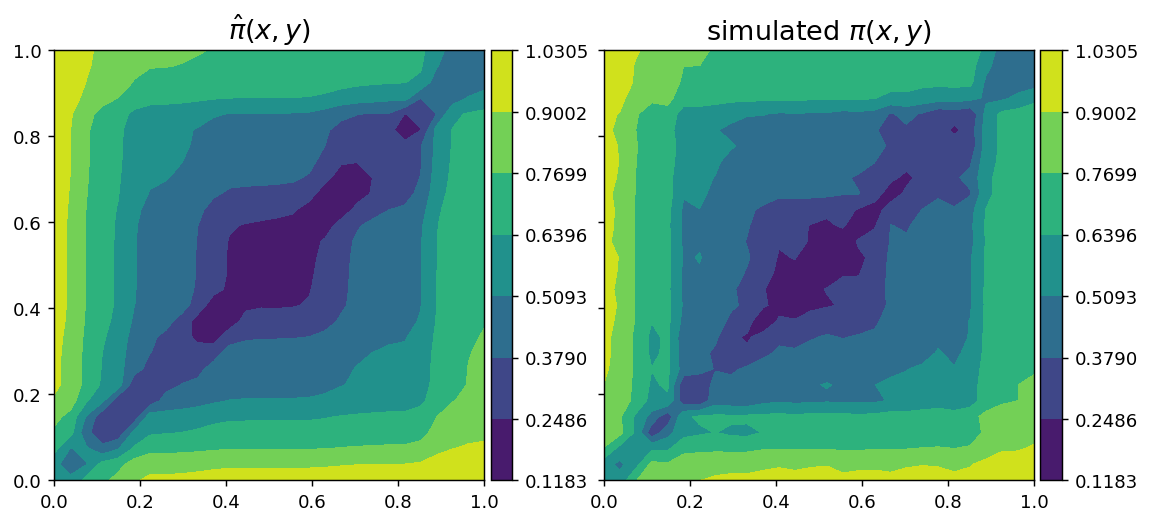

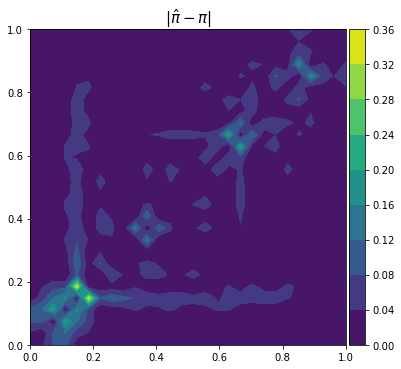

In [37]:
show_results(results)